# By Alex Dance

https://www.linkedin.com/in/alex-dance/

## Models -- Linear Regression + Decision Tree + Random Forest + XG Boost + Grid Search

In [1]:
print("Models Completed include more than just Decision Trees")
print(" ")
print("LR - Linear Regression")
print("DT - Decision Tree")
print("RF - Random Forest")
print("GS - Grid Search")
print("XG - XG Boost")
print(" ")

Models Completed include more than just Decision Trees
 
LR - Linear Regression
DT - Decision Tree
RF - Random Forest
GS - Grid Search
XG - XG Boost
 


In [2]:
print("Data Cleaning Options Used")
print(" ")
print("Option a) - Swap outliers for other data")
print("Option b) - Delete Outliers")

Data Cleaning Options Used
 
Option a) - Swap outliers for other data
Option b) - Delete Outliers


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
#from sklearn.linear_model import LinearRegression
from sklearn import svm, metrics
%matplotlib inline

In [4]:
class color:  # Testing to make the heading look a liitle more impressive
   BOLD = '\033[1m'

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

In [5]:
import pandas as pd
import numpy as np

In [6]:
# From 3.2.3 data = pd.read_csv('C:/Users/alexd/Alex Folder 1/Module 3/housing.data',header=None ,names=names, delim_whitespace=True)
#Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
# Data also form https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
names = ["Recency", "Frequency", "Monetary", "Time", "Donated"]
df = pd.read_csv('C:/Users/alexd/Alex Folder 1/Module 7/transfusion2.data',header=None, names=names)
adjusted_df= df.copy()
                 
df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [7]:
adjusted_df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [8]:
df.describe()

,Recency,Frequency,Monetary,Time,Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [11]:
df= df.astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    748 non-null    float64
 1   Frequency  748 non-null    float64
 2   Monetary   748 non-null    float64
 3   Time       748 non-null    float64
 4   Donated    748 non-null    float64
dtypes: float64(5)
memory usage: 29.3 KB


In [13]:
df['Recency'].value_counts()

2.0     173
4.0     156
11.0     84
14.0     76
16.0     63
23.0     50
21.0     44
9.0      20
3.0      13
1.0       9
7.0       8
5.0       6
8.0       6
12.0      6
6.0       5
0.0       5
13.0      5
10.0      3
15.0      2
18.0      2
38.0      2
25.0      1
74.0      1
17.0      1
40.0      1
20.0      1
39.0      1
22.0      1
26.0      1
35.0      1
72.0      1
Name: Recency, dtype: int64

In [14]:
df['Recency'].value_counts()

2.0     173
4.0     156
11.0     84
14.0     76
16.0     63
23.0     50
21.0     44
9.0      20
3.0      13
1.0       9
7.0       8
5.0       6
8.0       6
12.0      6
6.0       5
0.0       5
13.0      5
10.0      3
15.0      2
18.0      2
38.0      2
25.0      1
74.0      1
17.0      1
40.0      1
20.0      1
39.0      1
22.0      1
26.0      1
35.0      1
72.0      1
Name: Recency, dtype: int64

In [15]:
df['Frequency'].value_counts()

1.0     158
2.0     112
3.0      87
4.0      62
5.0      62
6.0      52
7.0      43
8.0      31
9.0      24
11.0     22
10.0     14
12.0     14
16.0     13
14.0     13
13.0      9
15.0      6
17.0      4
24.0      3
21.0      2
19.0      2
22.0      2
20.0      2
46.0      1
33.0      1
23.0      1
18.0      1
38.0      1
43.0      1
34.0      1
44.0      1
26.0      1
41.0      1
50.0      1
Name: Frequency, dtype: int64

In [16]:
df['Monetary'].value_counts()

250.0      158
500.0      112
750.0       87
1000.0      62
1250.0      62
1500.0      52
1750.0      43
2000.0      31
2250.0      24
2750.0      22
2500.0      14
3000.0      14
3500.0      13
4000.0      13
3250.0       9
3750.0       6
4250.0       4
6000.0       3
5000.0       2
4750.0       2
5250.0       2
5500.0       2
12500.0      1
9500.0       1
4500.0       1
8250.0       1
8500.0       1
6500.0       1
10750.0      1
5750.0       1
10250.0      1
11500.0      1
11000.0      1
Name: Monetary, dtype: int64

In [17]:
df['Time'].value_counts()

4.0     57
16.0    51
14.0    44
23.0    36
2.0     36
        ..
13.0     1
12.0     1
55.0     1
3.0      1
54.0     1
Name: Time, Length: 78, dtype: int64

In [18]:
df['Donated'].value_counts()

0.0    570
1.0    178
Name: Donated, dtype: int64

In [19]:
adjusted_df= adjusted_df.astype(float)

In [20]:
adjusted_df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2.0,50.0,12500.0,98.0,1.0
1,0.0,13.0,3250.0,28.0,1.0
2,1.0,16.0,4000.0,35.0,1.0
3,2.0,20.0,5000.0,45.0,1.0
4,1.0,24.0,6000.0,77.0,0.0


In [21]:
adjusted_df.shape

(748, 5)

In [22]:
train_a, test_a = train_test_split(adjusted_df, test_size=0.20, random_state=1)

In [23]:
train_a.head()

,Recency,Frequency,Monetary,Time,Donated
487,23.0,3.0,750.0,48.0,0.0
652,14.0,4.0,1000.0,26.0,0.0
667,11.0,1.0,250.0,11.0,1.0
537,2.0,6.0,1500.0,26.0,1.0
194,2.0,2.0,500.0,14.0,0.0


In [24]:
train_a.shape

(598, 5)

In [25]:
import seaborn as sns

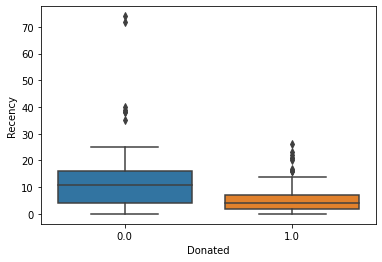

In [26]:
sns.boxplot(x='Donated', y='Recency',  data=train_a)

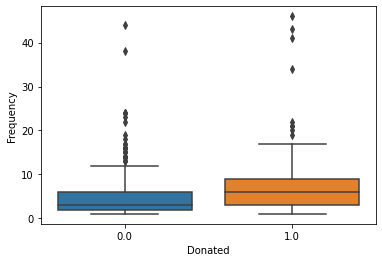

In [27]:
sns.boxplot(x='Donated', y='Frequency',  data=train_a)

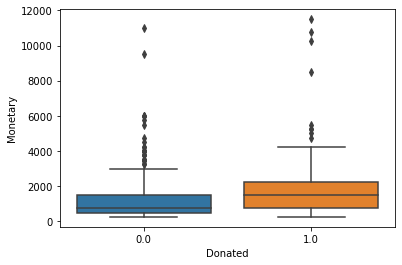

In [28]:
sns.boxplot(x='Donated', y='Monetary',  data=train_a)

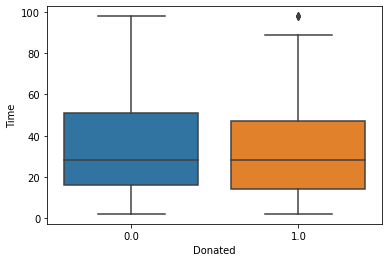

In [29]:
sns.boxplot(x='Donated', y='Time',  data=train_a)

# Preparing the Data

# Option a  for (a)djust the values

In [30]:
train_a.head()

,Recency,Frequency,Monetary,Time,Donated
487,23.0,3.0,750.0,48.0,0.0
652,14.0,4.0,1000.0,26.0,0.0
667,11.0,1.0,250.0,11.0,1.0
537,2.0,6.0,1500.0,26.0,1.0
194,2.0,2.0,500.0,14.0,0.0


In [31]:
train_a['Recency'].value_counts()

2.0     131
4.0     126
11.0     70
14.0     58
16.0     52
23.0     40
21.0     38
9.0      17
3.0      10
7.0       7
8.0       6
1.0       6
5.0       5
12.0      5
13.0      4
0.0       4
6.0       4
38.0      2
17.0      1
15.0      1
26.0      1
74.0      1
39.0      1
72.0      1
10.0      1
35.0      1
25.0      1
18.0      1
20.0      1
40.0      1
22.0      1
Name: Recency, dtype: int64

In [32]:
train_a.describe()

,Recency,Frequency,Monetary,Time,Donated
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,9.755853,5.498328,1374.581940,34.053512,0.229097
std,8.344986,5.797172,1449.292928,24.290201,0.420604
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,8.500000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,46.000000,11500.000000,98.000000,1.000000


In [33]:
train_a['Frequency'].values[train_a['Frequency'].values > train_a['Frequency'].quantile(0.9)] = df['Frequency'].mean()

In [34]:
train_a['Recency'].values[train_a['Recency'].values > train_a['Recency'].quantile(0.9)] = df['Recency'].mean()

In [35]:
train_a['Monetary'].values[train_a['Monetary'].values > train_a['Monetary'].quantile(0.9)] = df['Monetary'].mean()

In [36]:
train_a.describe()

,Recency,Frequency,Monetary,Time,Donated
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.328318,4.244664,1061.165896,34.053512,0.229097
std,5.887278,2.913433,728.358328,24.290201,0.420604
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,8.500000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,6.000000,1500.000000,50.000000,0.000000
max,21.000000,12.000000,3000.000000,98.000000,1.000000


In [37]:
train_a['Recency'].value_counts()

2.000000     131
4.000000     126
11.000000     70
14.000000     58
16.000000     52
9.506684      50
21.000000     38
9.000000      17
3.000000      10
7.000000       7
1.000000       6
8.000000       6
12.000000      5
5.000000       5
13.000000      4
0.000000       4
6.000000       4
18.000000      1
20.000000      1
10.000000      1
17.000000      1
15.000000      1
Name: Recency, dtype: int64

In [38]:
train_a['Frequency'].value_counts()

1.000000     132
2.000000      91
3.000000      62
5.514706      55
4.000000      50
5.000000      49
6.000000      44
7.000000      33
8.000000      25
9.000000      18
11.000000     15
12.000000     14
10.000000     10
Name: Frequency, dtype: int64

In [41]:
# Tis is on the original data (ie not cleaned)
y = df[['Donated']]
X = df[['Monetary', 'Recency','Frequency','Time']]

In [42]:
len(X)

748

In [43]:
len(y)

748

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # For uncleaned data

# Function for all

In [45]:
def find_all(y_test_f,X_test_f,model_f,X_train_f, y_train_f):
    model_f.fit(X_train_f, y_train_f)
    preds = model_f.predict_proba(X_test_f)[:,1]
    fpr, tpr, thresholds  = metrics.roc_curve(y_test_f, preds)
    roc_auc = metrics.auc(fpr, tpr)
    y_pred_f = model_f.predict(X_test)
    cf = confusion_matrix(y_test_f, y_pred_f)
    accuracy_score_train =  model_f.score(X_train_f, y_train_f) 
    accuracy_score_test =  model_f.score(X_test_f, y_test_f)    
    return{'auc': roc_auc, 'cfm':cf ,'accuracy_score_train':accuracy_score_train , 'accuracy_score_test':accuracy_score_test}

# Linear Regression for the uncleaned Data

In [46]:
LR_Results= find_all(y_test, X_test ,LogisticRegression(), X_train, y_train)
print(color.BOLD +"Linear Regression Results on Uncleaned Data")
print ('\033[0m')

print("LR Uncleaned AUC Test  %.2f%%" % (LR_Results['auc']* 100.0))
print(LR_Results['cfm'])
print("LR Uncleaned accuracy_score_train  %.2f%%" % (LR_Results ['accuracy_score_train'] * 100.0))
print("LR Uncleaned accuracy_score_test  %.2f%%" % (LR_Results ['accuracy_score_test']* 100.0))



Linear Regression Results on Uncleaned Data

LR Uncleaned AUC Test  79.06%
[[107   2]
 [ 36   5]]
LR Uncleaned accuracy_score_train  77.93%
LR Uncleaned accuracy_score_test  74.67%


C:\Users\alexd\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print(LR_Results)

{'auc': 0.7905571716267621, 'cfm': array([[107,   2],
       [ 36,   5]], dtype=int64), 'accuracy_score_train': 0.7792642140468228, 'accuracy_score_test': 0.7466666666666667}


In [48]:
Full_Confusion_Matrix = pd.DataFrame(LR_Results['cfm'], index = ["is_True", "is_False"], columns = ("predict_True", "predict_False"))

In [49]:
Full_Confusion_Matrix["Source"] = "Linear Regression uncleaned"

In [50]:
print(Full_Confusion_Matrix)

          predict_True  predict_False                       Source
is_True            107              2  Linear Regression uncleaned
is_False            36              5  Linear Regression uncleaned


# Prepare Adjusted Data

In [51]:
# Note this was all done AFTER the cleaning and the cleaning was ONLY done on the Adjusted training data
y_train_a = train_a[['Donated']]
X_train_a = train_a[['Monetary', 'Recency','Frequency','Time']]
X_test_a = X_test
y_test_a = y_test

# LR on Adjusted

In [52]:
LR_Results_Adjusted= find_all(y_test_a, X_test_a ,LogisticRegression(), X_train_a, y_train_a)
print(color.BOLD +"Linear Regression Results on Adjusted Data")
print ('\033[0m')

print("LR_Results_Adjusted AUC Test  %.2f%%" % (LR_Results_Adjusted['auc']* 100.0))
print(LR_Results_Adjusted['cfm'])
print("LR_Results_Adjusted accuracy_score_train  %.2f%%" % (LR_Results_Adjusted ['accuracy_score_train'] * 100.0))
print("LR_Results_Adjusted accuracy_score_test  %.2f%%" % (LR_Results_Adjusted ['accuracy_score_test']* 100.0))


Linear Regression Results on Adjusted Data

LR_Results_Adjusted AUC Test  76.35%
[[103   6]
 [ 29  12]]
LR_Results_Adjusted accuracy_score_train  77.26%
LR_Results_Adjusted accuracy_score_test  76.67%


C:\Users\alexd\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Getting Confusion Matrix in a dataframe for better comparison purposes

In [53]:
TempMatrix = pd.DataFrame(LR_Results_Adjusted['cfm'], index = ["is_True", "is_False"], columns = ("predict_True", "predict_False"))
TempMatrix["Source"] = "Linear Regression Cleaned"
Full_Confusion_Matrix.append(TempMatrix)

,predict_True,predict_False,Source
is_True,107,2,Linear Regression uncleaned
is_False,36,5,Linear Regression uncleaned
is_True,103,6,Linear Regression Cleaned
is_False,29,12,Linear Regression Cleaned


In [54]:
print(Full_Confusion_Matrix)

          predict_True  predict_False                       Source
is_True            107              2  Linear Regression uncleaned
is_False            36              5  Linear Regression uncleaned


In [55]:
print(TempMatrix)

          predict_True  predict_False                     Source
is_True            103              6  Linear Regression Cleaned
is_False            29             12  Linear Regression Cleaned


# Checking Max and other values after adjusting the data

In [56]:
X_train_a.describe()

,Monetary,Recency,Frequency,Time
count,598.000000,598.000000,598.000000,598.000000
mean,1061.165896,8.328318,4.244664,34.053512
std,728.358328,5.887278,2.913433,24.290201
min,250.000000,0.000000,1.000000,2.000000
25%,500.000000,3.000000,2.000000,16.000000
50%,1000.000000,8.500000,4.000000,28.000000
75%,1500.000000,14.000000,6.000000,50.000000
max,3000.000000,21.000000,12.000000,98.000000


In [57]:
X_train.describe()

,Monetary,Recency,Frequency,Time
count,598.000000,598.000000,598.000000,598.000000
mean,1374.581940,9.755853,5.498328,34.053512
std,1449.292928,8.344986,5.797172,24.290201
min,250.000000,0.000000,1.000000,2.000000
25%,500.000000,3.000000,2.000000,16.000000
50%,1000.000000,8.500000,4.000000,28.000000
75%,1750.000000,14.000000,7.000000,50.000000
max,11500.000000,74.000000,46.000000,98.000000


In [58]:
X_train_a['Recency'].value_counts()

2.000000     131
4.000000     126
11.000000     70
14.000000     58
16.000000     52
9.506684      50
21.000000     38
9.000000      17
3.000000      10
7.000000       7
1.000000       6
8.000000       6
12.000000      5
5.000000       5
13.000000      4
0.000000       4
6.000000       4
18.000000      1
20.000000      1
10.000000      1
17.000000      1
15.000000      1
Name: Recency, dtype: int64

In [59]:
X_train['Recency'].value_counts()

2.0     131
4.0     126
11.0     70
14.0     58
16.0     52
23.0     40
21.0     38
9.0      17
3.0      10
7.0       7
8.0       6
1.0       6
5.0       5
12.0      5
13.0      4
0.0       4
6.0       4
38.0      2
17.0      1
15.0      1
26.0      1
74.0      1
39.0      1
72.0      1
10.0      1
35.0      1
25.0      1
18.0      1
20.0      1
40.0      1
22.0      1
Name: Recency, dtype: int64

# Run Decision Tree

In [60]:
# https://www.geeksforgeeks.org/decision-tree-implementation-python/

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
DT_Uncleaned_gini= find_all(y_test, X_test ,DecisionTreeClassifier(criterion = "gini",  random_state = 100,max_depth=3, min_samples_leaf=5) , X_train, y_train)
print(color.BOLD +"Decision Tree Results on Gini Uncleaned Data")
print ('\033[0m')

print("DT_Uncleaned_gini: AUC Test  %.2f%%" % (DT_Uncleaned_gini['auc']* 100.0))
print(DT_Uncleaned_gini['cfm'])
print("DT_Uncleaned_gini : accuracy_score_train  %.2f%%" % (DT_Uncleaned_gini ['accuracy_score_train'] * 100.0))
print(": DT_Uncleaned_gini accuracy_score_test  %.2f%%" % (DT_Uncleaned_gini ['accuracy_score_test']* 100.0))

Decision Tree Results on Gini Uncleaned Data

DT_Uncleaned_gini: AUC Test  73.42%
[[99 10]
 [22 19]]
DT_Uncleaned_gini : accuracy_score_train  79.77%
: DT_Uncleaned_gini accuracy_score_test  78.67%


In [63]:
DT_Uncleaned_entropy= find_all(y_test, X_test ,DecisionTreeClassifier(criterion = "entropy",  random_state = 100,max_depth=3, min_samples_leaf=5) , X_train, y_train)
print(color.BOLD +"Decision Tree Results on Entropy Uncleaned Data")
print ('\033[0m')

print("DT_Uncleaned_entropy - AUC   %.2f%%" % (DT_Uncleaned_entropy['auc']* 100.0))
print(DT_Uncleaned_entropy['cfm'])
print("DT_Uncleaned_entropy accuracy_score_train  %.2f%%" % (DT_Uncleaned_entropy ['accuracy_score_train'] * 100.0))
print("DT_Uncleaned_entropy accuracy_score_test  %.2f%%" % (DT_Uncleaned_entropy ['accuracy_score_test']* 100.0))

Decision Tree Results on Entropy Uncleaned Data

DT_Uncleaned_entropy - AUC   72.81%
[[99 10]
 [22 19]]
DT_Uncleaned_entropy accuracy_score_train  79.77%
DT_Uncleaned_entropy accuracy_score_test  78.67%


In [64]:
DT_Results_Adjusted= find_all(y_test_a, X_test_a ,DecisionTreeClassifier(criterion = "gini",  random_state = 100,max_depth=3, min_samples_leaf=5), X_train_a, y_train_a)
print(color.BOLD +"Decision Tree Gini Results on Adjusted Data")
print ('\033[0m')

print("DT_Results_Adjusted AUC Test  %.2f%%" % (DT_Results_Adjusted['auc']* 100.0))
print(DT_Results_Adjusted['cfm'])
print("DT_Results_Adjusted accuracy_score_train  %.2f%%" % (DT_Results_Adjusted ['accuracy_score_train'] * 100.0))
print("DT_Results_Adjusted accuracy_score_test  %.2f%%" % (DT_Results_Adjusted ['accuracy_score_test']* 100.0))

Decision Tree Gini Results on Adjusted Data

DT_Results_Adjusted AUC Test  72.79%
[[99 10]
 [22 19]]
DT_Results_Adjusted accuracy_score_train  79.77%
DT_Results_Adjusted accuracy_score_test  78.67%


# Run 2 lines of Model - purely for Decision Tree Plot

In [65]:
#https://medium.com/@garg.mohit851/random-forest-visualization-3f76cdf6456f
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
# https://stackoverflow.com/questions/59447378/sklearn-plot-tree-plot-is-too-small
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
DT_Uncleaned_Model = DecisionTreeClassifier(criterion = "gini",  random_state = 100,max_depth=3, min_samples_leaf=5)

In [68]:
DT_Uncleaned_Model.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [69]:
DT_Clean_Model = DecisionTreeClassifier(criterion = "gini",  random_state = 100,max_depth=3, min_samples_leaf=5)

In [70]:
DT_Clean_Model.fit(X_train_a, y_train_a)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [71]:
import matplotlib.pyplot as plt
from sklearn import tree

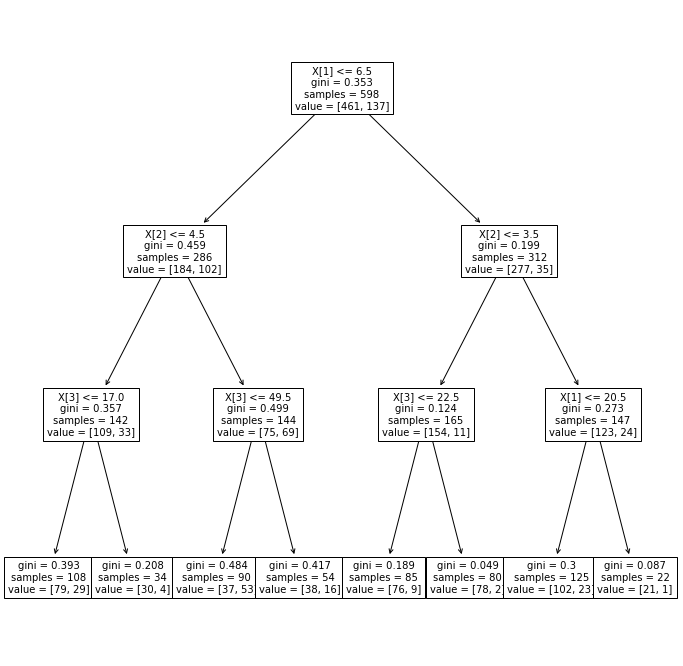

In [72]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(DT_Uncleaned_Model, max_depth=4, fontsize=10)
plt.show()

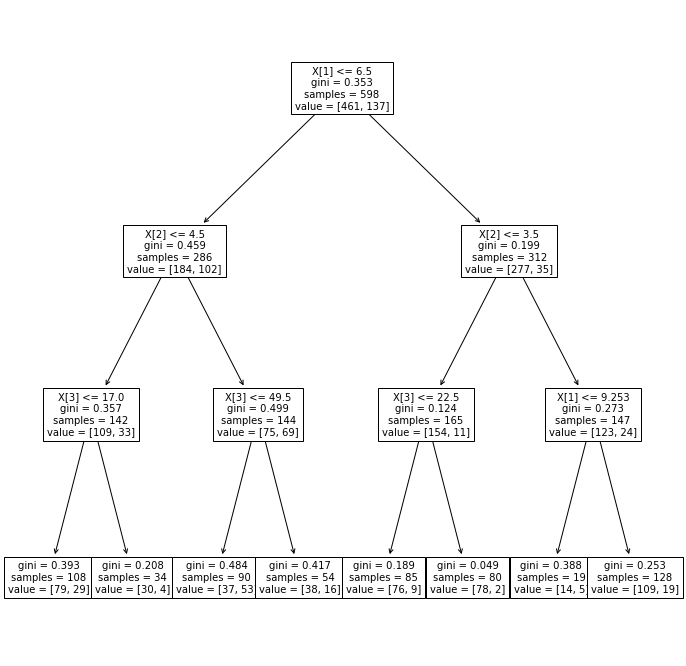

In [73]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(DT_Clean_Model, max_depth=4, fontsize=10)
plt.show()

# Grid Search

In [74]:
#from https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

In [75]:
from sklearn.model_selection import GridSearchCV,  cross_val_score

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets

In [77]:
 sc = StandardScaler()
pca = decomposition.PCA()

In [78]:
pipe = Pipeline(steps=[('sc', sc),('pca', pca), ('decisiontree', DT_Uncleaned_Model)])

In [79]:
n_components = list(range(1,X.shape[1]+1,1))

In [80]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

In [81]:
parameters = dict(pca__n_components=n_components,
                      decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

In [82]:
clf = GridSearchCV(pipe, parameters)

In [83]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('decisiontree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                              

In [84]:
# View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['decisiontree'])

Best Criterion: gini
Best max_depth: 4
Best Number Of Components: 1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [85]:
# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X, y, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.45454545 0.80213904 0.7486631  0.7540107 ]

0.6898395721925134

0.13743419546413257


# Now Model after Grid search

In [86]:
DT_Uncleaned_GS= find_all(y_test, X_test ,DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best') , X_train, y_train)
print(color.BOLD +"Decision Tree Results on Grid Search Uncleaned Data")
print ('\033[0m')

print("DT_Uncleaned_GS: AUC Test  %.2f%%" % (DT_Uncleaned_GS['auc']* 100.0))
print(DT_Uncleaned_gini['cfm'])
print("DT_Uncleaned_GS : accuracy_score_train  %.2f%%" % (DT_Uncleaned_GS ['accuracy_score_train'] * 100.0))
print("DT_Uncleaned_GS accuracy_score_test  %.2f%%" % (DT_Uncleaned_GS ['accuracy_score_test']* 100.0))

Decision Tree Results on Grid Search Uncleaned Data

DT_Uncleaned_GS: AUC Test  76.49%
[[99 10]
 [22 19]]
DT_Uncleaned_GS : accuracy_score_train  79.77%
DT_Uncleaned_GS accuracy_score_test  78.67%


# Now Random Forest

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/  for regression that this is NOT
https://www.datacamp.com/community/tutorials/random-forests-classifier-python  for classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
RF_Uncleaned = find_all(y_test, X_test ,RandomForestClassifier(n_estimators=100) , X_train, y_train)
print(color.BOLD +"Decision Tree Results on Gini Uncleaned Data")
print ('\033[0m')

print("RF_Uncleaned AUC Test  %.2f%%" % (RF_Uncleaned['auc']* 100.0))
print(RF_Uncleaned['cfm'])
print("RF_Uncleaned accuracy_score_train  %.2f%%" % (RF_Uncleaned ['accuracy_score_train'] * 100.0))
print("RF_Uncleaned accuracy_score_test  %.2f%%" % (RF_Uncleaned ['accuracy_score_test']* 100.0))

Decision Tree Results on Gini Uncleaned Data

RF_Uncleaned AUC Test  73.63%
[[96 13]
 [23 18]]
RF_Uncleaned accuracy_score_train  93.48%
RF_Uncleaned accuracy_score_test  76.00%


C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [88]:
RF_Adjusted= find_all(y_test_a, X_test_a, RandomForestClassifier(n_estimators=100), X_train_a, y_train_a)
print(color.BOLD +"Decision Tree Gini Results on Adjusted Data")
print ('\033[0m')

print("RF_Adjusted AUC Test  %.2f%%" % (RF_Adjusted['auc']* 100.0))
print(RF_Adjusted['cfm'])
print("RF_Adjusted accuracy_score_train  %.2f%%" % (RF_Adjusted ['accuracy_score_train'] * 100.0))
print("RF_Adjusted accuracy_score_test  %.2f%%" % (RF_Adjusted ['accuracy_score_test']* 100.0))

C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Decision Tree Gini Results on Adjusted Data

RF_Adjusted AUC Test  73.16%
[[96 13]
 [27 14]]
RF_Adjusted accuracy_score_train  93.31%
RF_Adjusted accuracy_score_test  73.33%


# Now XG Boost

In [89]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [90]:
# !pip install xgboost

In [91]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [92]:
XGUncleaned= find_all(y_test, X_test ,XGBClassifier(), X_train, y_train)
print(color.BOLD +"XG Results on Uncleaned Data")
print ('\033[0m')

print("XGUncleaned AUC Test  %.2f%%" % (XGUncleaned['auc']* 100.0))
print(XGUncleaned['cfm'])
print("XGUncleaned accuracy_score_train  %.2f%%" % (XGUncleaned ['accuracy_score_train'] * 100.0))
print("XGUncleaned accuracy_score_test  %.2f%%" % (XGUncleaned ['accuracy_score_test']* 100.0))

C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexd\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XG Results on Uncleaned Data

XGUncleaned AUC Test  71.78%
[[95 14]
 [25 16]]
XGUncleaned accuracy_score_train  92.31%
XGUncleaned accuracy_score_test  74.00%


In [93]:
XG_Results_Adjusted= find_all(y_test_a, X_test_a ,XGBClassifier(), X_train_a, y_train_a)
print(color.BOLD +"XG Boost Results on Adjusted Data")
print ('\033[0m')

print("XG_Results_Adjusted AUC Test  %.2f%%" % (XG_Results_Adjusted['auc']* 100.0))
print(XG_Results_Adjusted['cfm'])
print("XG_Results_Adjusted accuracy_score_train  %.2f%%" % (XG_Results_Adjusted ['accuracy_score_train'] * 100.0))
print("XG_Results_Adjustedaccuracy_score_test  %.2f%%" % (XG_Results_Adjusted ['accuracy_score_test']* 100.0))

XG Boost Results on Adjusted Data

XG_Results_Adjusted AUC Test  70.02%
[[100   9]
 [ 25  16]]
XG_Results_Adjusted accuracy_score_train  92.98%
XG_Results_Adjustedaccuracy_score_test  77.33%


# Compare options

In [94]:
print(color.BOLD +"Explanation")
print ('\033[0m')
print(" ")
print("LR - Linear Regression")
print("AUC - Area Under Curve")
print("DT - Decision Tree")
print("RF - Random Forest")
print("GS - Grid Search")
print("XG - XG Boost")
print(" ")
print(color.BOLD +"Comparing Accuracy Scores on AUC")
print ('\033[0m')
print(" ")
print("LR Uncleaned AUC Test  %.2f%%" % (LR_Results['auc']* 100.0))
print("LR_Results_Adjusted AUC Test  %.2f%%" % (LR_Results_Adjusted['auc']* 100.0))
print(" ")
print("DT_Uncleaned_gini: AUC Test  %.2f%%" % (DT_Uncleaned_gini['auc']* 100.0))
print("DT_Uncleaned_entropy - AUC   %.2f%%" % (DT_Uncleaned_entropy['auc']* 100.0))
print("DT_Results_Adjusted AUC Test  %.2f%%" % (DT_Results_Adjusted['auc']* 100.0))
print(" ")
print("DT_Uncleaned_GS: AUC Test  %.2f%%" % (DT_Uncleaned_GS['auc']* 100.0))
print(" ")
print("RF_Uncleaned AUC Test  %.2f%%" % (RF_Uncleaned['auc']* 100.0))
print("RF_Adjusted AUC Test  %.2f%%" % (RF_Adjusted['auc']* 100.0))
print(" ")
print("XGUncleaned AUC Test  %.2f%%" % (XGUncleaned['auc']* 100.0))
print("XG_Results_Adjusted AUC Test  %.2f%%" % (XG_Results_Adjusted['auc']* 100.0))
print(" ")
print(" ")
print(color.BOLD +"Comparing Other Accuracy Scores")
print ('\033[0m')
print(" ")
print("LR Uncleaned accuracy_score_train  %.2f%%" % (LR_Results ['accuracy_score_train'] * 100.0))
print("LR Uncleaned accuracy_score_test  %.2f%%" % (LR_Results ['accuracy_score_test']* 100.0))
print(" ")
print("LR_Results_Adjusted accuracy_score_train  %.2f%%" % (LR_Results_Adjusted ['accuracy_score_train'] * 100.0))
print("LR_Results_Adjusted accuracy_score_test  %.2f%%" % (LR_Results_Adjusted ['accuracy_score_test']* 100.0))
print(" ")
print("DT_Uncleaned_gini : accuracy_score_train  %.2f%%" % (DT_Uncleaned_gini ['accuracy_score_train'] * 100.0))
print("DT_Uncleaned_gini accuracy_score_test  %.2f%%" % (DT_Uncleaned_gini ['accuracy_score_test']* 100.0))
print(" ")
print("DT_Uncleaned_entropy accuracy_score_train  %.2f%%" % (DT_Uncleaned_entropy ['accuracy_score_train'] * 100.0))
print("DT_Uncleaned_entropy accuracy_score_test  %.2f%%" % (DT_Uncleaned_entropy ['accuracy_score_test']* 100.0))
print(" ")
print("DT_Uncleaned_GS : accuracy_score_train  %.2f%%" % (DT_Uncleaned_GS ['accuracy_score_train'] * 100.0))
print("DT_Uncleaned_GS accuracy_score_test  %.2f%%" % (DT_Uncleaned_GS ['accuracy_score_test']* 100.0))
print(" ")
print("DT_Results_Adjusted accuracy_score_train  %.2f%%" % (DT_Results_Adjusted ['accuracy_score_train'] * 100.0))
print("DT_Results_Adjusted accuracy_score_test  %.2f%%" % (DT_Results_Adjusted ['accuracy_score_test']* 100.0))
print(" ")
print("RF_Uncleaned accuracy_score_train  %.2f%%" % (RF_Uncleaned ['accuracy_score_train'] * 100.0))
print("RF_Uncleaned accuracy_score_test  %.2f%%" % (RF_Uncleaned ['accuracy_score_test']* 100.0))
print(" ")
print("RF_Adjusted accuracy_score_train  %.2f%%" % (RF_Adjusted ['accuracy_score_train'] * 100.0))
print("RF_Adjusted accuracy_score_test  %.2f%%" % (RF_Adjusted ['accuracy_score_test']* 100.0))
print(" ")
print("XGUncleaned accuracy_score_train  %.2f%%" % (XGUncleaned ['accuracy_score_train'] * 100.0))
print("XGUncleaned accuracy_score_test  %.2f%%" % (XGUncleaned ['accuracy_score_test']* 100.0))
print(" ")
print("XG_Results_Adjusted accuracy_score_train  %.2f%%" % (XG_Results_Adjusted ['accuracy_score_train'] * 100.0))
print("XG_Results_Adjustedaccuracy_score_test  %.2f%%" % (XG_Results_Adjusted ['accuracy_score_test']* 100.0))


Explanation

 
LR - Linear Regression
AUC - Area Under Curve
DT - Decision Tree
RF - Random Forest
GS - Grid Search
XG - XG Boost
 
Comparing Accuracy Scores on AUC

 
LR Uncleaned AUC Test  79.06%
LR_Results_Adjusted AUC Test  76.35%
 
DT_Uncleaned_gini: AUC Test  73.42%
DT_Uncleaned_entropy - AUC   72.81%
DT_Results_Adjusted AUC Test  72.79%
 
DT_Uncleaned_GS: AUC Test  76.49%
 
RF_Uncleaned AUC Test  73.63%
RF_Adjusted AUC Test  73.16%
 
XGUncleaned AUC Test  71.78%
XG_Results_Adjusted AUC Test  70.02%
 
 
Comparing Other Accuracy Scores

 
LR Uncleaned accuracy_score_train  77.93%
LR Uncleaned accuracy_score_test  74.67%
 
LR_Results_Adjusted accuracy_score_train  77.26%
LR_Results_Adjusted accuracy_score_test  76.67%
 
DT_Uncleaned_gini : accuracy_score_train  79.77%
DT_Uncleaned_gini accuracy_score_test  78.67%
 
DT_Uncleaned_entropy accuracy_score_train  79.77%
DT_Uncleaned_entropy accuracy_score_test  78.67%
 
DT_Uncleaned_GS : accuracy_score_train  79.77%
DT_Uncleaned_GS accur

# Alex Commentary

In [95]:
# Using AUC as the main comparison option
# LR (Linear Regression) on uncleaned gave the best result on the test
# GS (Grid Search) improved the results by 3% so the others would do well with Grid Search

# From above
# Target Accuracy = 0.6895 -  Highest Train was > 90% - Highest Training was 78%
# Target ROC AUC = 0.5690 - All above 70% - Highest was 79%